This porject is to analyze Airbnb Price in Seattle areas, as well as to have a conclusion of how to be a top earner in seattle airbnb.

Import libaries and read csv files

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string as string

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestRegressor

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error 

In [134]:
from datetime import datetime

In [135]:
calender = pd.read_csv('seattle_calendar.csv')
review = pd.read_csv('seattle_reviews.csv')
listing = pd.read_csv('seattle_listings.csv')

## Clean Data
First to look what information is provided and to deal with missing data.

### Listing

In [136]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [137]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

visualizing missing values in Listing Dataset

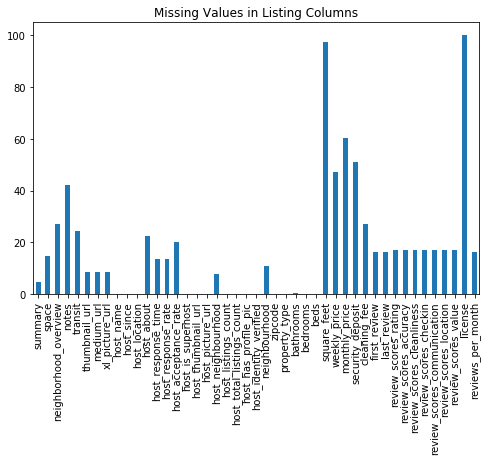

In [138]:
listing_missing_values = listing.isnull().mean()*100
listing_null_columns = listing_missing_values[listing_missing_values>0]
plt.figure(figsize=(8,5))
listing_null_columns.plot.bar(title = 'Missing Values in Listing Columns')

- Missing major amount of data in License, square_feet, monthly_price, weekly_price and security deposit. 


### Calender 

In [139]:
calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [140]:
calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


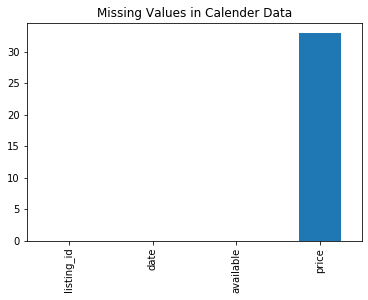

In [141]:
calender_missing_values = calender.isnull().mean()*100
calender_missing_values.plot.bar(title='Missing Values in Calender Data')

- Around 30% missing vaules in price columns.

### Preparaing Data

In [142]:
# Merge two datasets
listing = listing.rename(index = str, columns = {'id':'listing_id'})
df = pd.merge(calender,listing,on = 'listing_id')

In [143]:
columns_to_drop = ['available', 'host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'price_y',
                  'reviews_per_month']
df = df.drop(columns = columns_to_drop)

In [144]:
df['date'][0].split('-')

['2016', '01', '04']

In [145]:
# Covert date into month and year
def get_month(row):
    return int(row['date'].split('-')[1])
def get_year(row):
    return int(row['date'].split('-')[0])
df['year'] = df.apply(lambda row:get_year(row),axis=1)
df['month'] = df.apply(lambda row:get_month(row),axis=1)

In [146]:
df = df.drop('date',axis = 1)

In [147]:
# drop null values for price
df = df.dropna(subset = ['price_x'])

In [148]:
# Convert price to number
df['price'] = df['price_x'].astype(str)
df['price'] = df['price'].str.replace('[$, ]','').astype(float)
df = df.drop('price_x',axis = 1)

In [149]:
# Clean host_since_year columns
df['host_since_year'] = df['year']
df['host_since_year'].fillna(df['host_since_year'].mean(),inplace = True)
df = df.drop('host_since',axis =1 )

In [150]:
# Clean host_respons_rate into numeric 
df['host_response_rate_num'] = df['host_response_rate'].astype(str)
df['host_response_rate_num'] = df['host_response_rate_num'].str.replace('%','').astype(float)
df['host_response_rate_num'].fillna(df['host_response_rate_num'].mean(),inplace=True)
df = df.drop(columns = ['host_response_rate','host_response_time'],axis = 1)

In [153]:
# Missing values for bathrooms, bedrooms an bed with mode
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['beds'] = df['beds'].fillna(df['beds'].mode()[0])

In [184]:
# Determine if chrage for extra people in airbnb
def extra_people_fee (row):
    if row['extra_people'] == '$0.00':
        return 0
    else:
        return 1
df['extra_people_fee'] = df.apply(lambda row:extra_people_fee(row),axis = 1)
df = df.drop('extra_people',axis=1)

In [185]:
# Missing values for review socres
review_scores_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                        'review_scores_value']
for column in review_scores_columns:
    df[column].fillna(df[column].mean(),inplace = True)

## Analysis
### Price

In [190]:
print('min',df['price'].min())
print('max',df['price'].max())
print('mean',df['price'].mean())

min 10.0
max 1650.0
mean 137.94485855103355


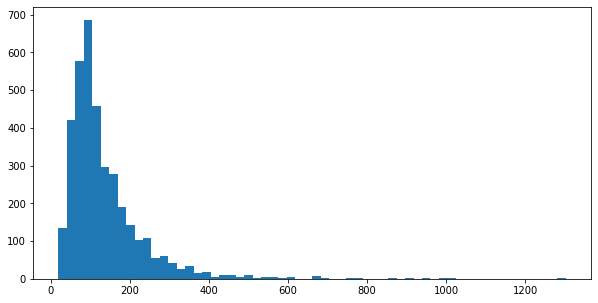

In [200]:
# Average prices for each ID
mean_price_id= df.groupby('listing_id').mean()['price']
# Plot the distribution of price
plt.figure(figsize = (10,5))
plt.hist(mean_price_id,bins= 60)
plt.show()

We can see the majority of the prices land on 50-150
### Time

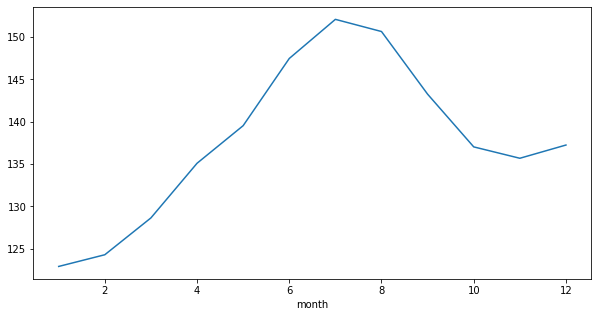

In [209]:
# the average price of listing in 2016 seperated by month
average_price_per_month = df.groupby(['month'])['price'].mean()
plt.figure(figsize = (10,5))
plt.plot(average_price_per_month)
plt.xlabel('month')
plt.show()

We can see the price summer (june,july, august) is the highest. Winter also intends to increas a little. 

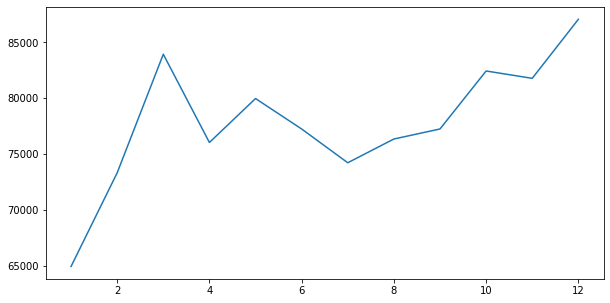

In [216]:
# Number of listing per month
number_of_listing_per_month = df.groupby(['month']).agg('count')
plt.figure(figsize=(10,5))
plt.plot(number_of_listing_per_month['listing_id'])
plt.show()

We can see the listings are increasing from summer to winter while decrese from spring to summer. It reasches its lower points in summer.

### Neighborhood

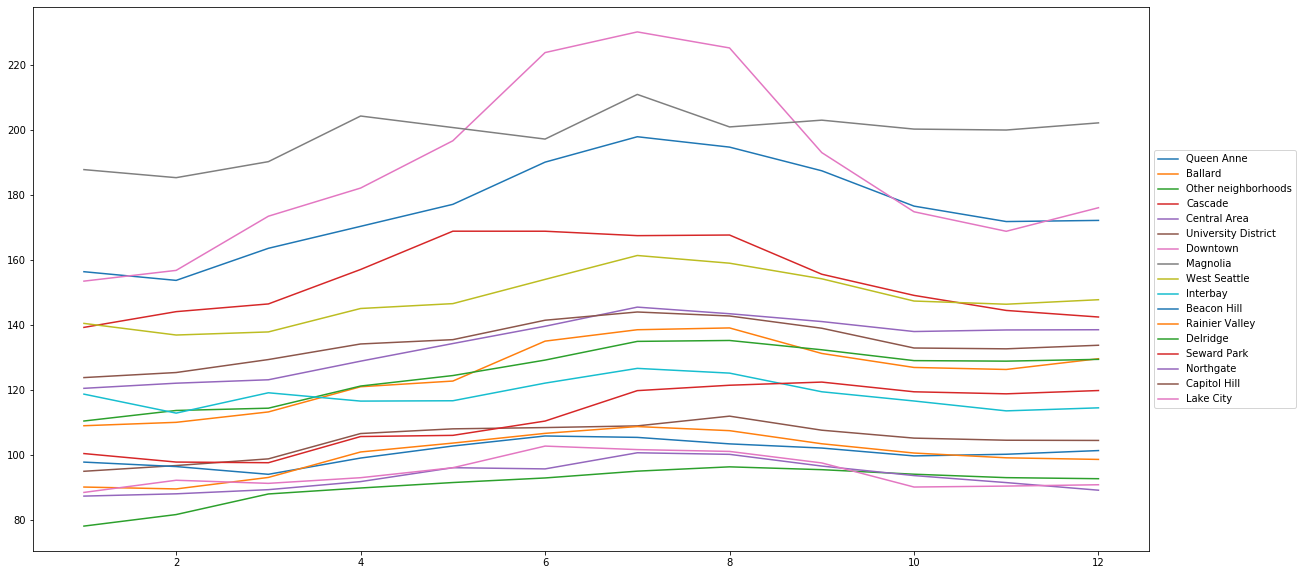

In [218]:
#get list of neighbourhoods
neighbourhoods = df['neighbourhood_group_cleansed'].unique()

price_by_month_neighbourhood = df.groupby(['month','neighbourhood_group_cleansed']).mean().reset_index()

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)

for neighbourhood in neighbourhoods:
    ax.plot(price_by_month_neighbourhood[price_by_month_neighbourhood['neighbourhood_group_cleansed'] == neighbourhood]['month'],
             price_by_month_neighbourhood[price_by_month_neighbourhood['neighbourhood_group_cleansed'] == neighbourhood]['price'],
             label = neighbourhood) 
box = ax.get_position()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

We can see there are huge price in different areas which makes sense. It is a lot more expensive in Downtown area. All the neighborhood intend to increas price in the summer and lower price in spring.
### Correlation between price and other factors

In [219]:
correlation_columns = ['accommodates','bathrooms','bedrooms','beds','host_since_year',
                        'host_listings_count', 'extra_people_fee',
                        'review_scores_rating', 'price']

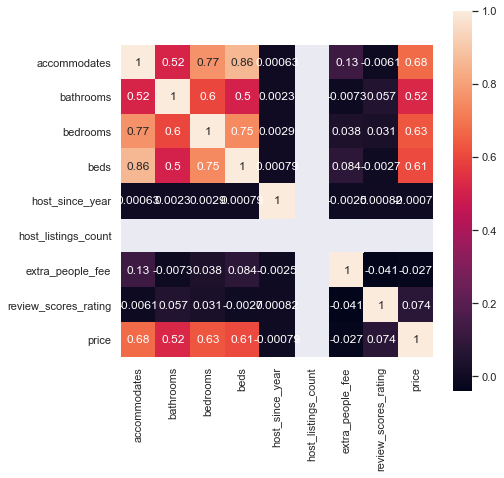

In [224]:
corrs = np.corrcoef(df[correlation_columns].values.T)
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True,
              yticklabels = correlation_columns, xticklabels = correlation_columns)

fig = hm.get_figure()
fig.savefig('correlations.png')

We can see accomodates, bedrooms, beds and bathrooms has a huge impact on price. Scores_rating and charing for extra peope have barely impacts to the price.
## Machine Learning

In [254]:
df = df.drop(columns = df.select_dtypes(include=['object']).columns)
df.dropna(inplace = True)

### Random Forest

In [255]:
X = df.drop(columns= 'price')
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =42)

In [256]:
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1)
forest.fit(X_train, y_train.squeeze())

y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

In [249]:
print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 177.062, test: 197.065
Random Forest R^2 train: 0.984, test: 0.982


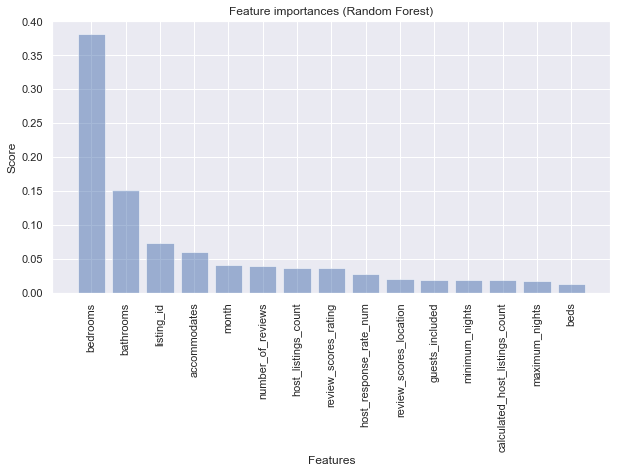

In [257]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
forest_feature_importances = pd.DataFrame(values, columns = headers)
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

features = forest_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:15]

plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (Random Forest)')

plt.savefig('feature importances RF.png')
 
plt.show()

### Conclusion
The result showd us the important factos for prices. 
- The same as we analyzed before, the graph showed that bedrooms, bathrooms are the most important factors. Airbnb owners can increase available bedrooms and bathrooms to increase the rent prices. 
- The important factors for hosts are number of host's listing, unmebr of years sine being the hosts, and response time.
- Reviews have a small impacts to price too. More reviews and higher rating can cause a higher price.